### Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Datasets/insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


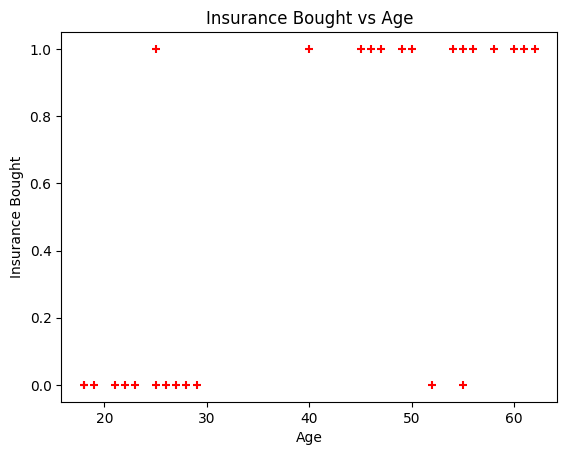

In [4]:
plt.title('Insurance Bought vs Age')
plt.xlabel('Age')
plt.ylabel('Insurance Bought')
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df['bought_insurance'],test_size=0.2)
X_test

,age
24,50
7,60
22,40
12,27
9,61
26,23


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
X_test

,age
24,50
7,60
22,40
12,27
9,61
26,23


In [11]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0])

In [12]:
y_test

24    1
7     1
22    1
12    0
9     1
26    0
Name: bought_insurance, dtype: int64

In [13]:
model.score(X_test,y_test)

0.8333333333333334

In [14]:
model.predict_proba(X_test)

array([[0.23885985, 0.76114015],
       [0.08734186, 0.91265814],
       [0.50716212, 0.49283788],
       [0.82814238, 0.17185762],
       [0.07832754, 0.92167246],
       [0.88570035, 0.11429965]])

model.coef_ indicates value of m in y=m*x + b equation



In [15]:
model.coef_

array([[0.1187591]])

model.intercept_ indicates value of b in y=m*x + b equation

In [16]:
model.intercept_

array([-4.77901446])

Lets defined sigmoid function now and do the math with hand

In [17]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [18]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [19]:
age = 35
prediction_function(age)

0.4850044983805899

0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [20]:
age = 43
prediction_function(age)

0.568565299077705

0.568 is more than 0.5 which means person with 43 will buy the insurance